## **0.0 Imports**

In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import inflection
import matplotlib.pyplot as plt
from sklearn import model_selection as ms
from sklearn.ensemble     import RandomForestRegressor
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error



pd.set_option('display.float_format','{:.2f}'.format)

### 0.1 Helper Functions

In [187]:
def mean_absolute_percentage_error(y, yhat):
    return np.mean(np.abs((y-yhat)/y))

def ml_error(model_name, y, yhat):
    mae = mean_absolute_error(y, yhat)
    mape = mean_absolute_percentage_error(y, yhat)
    rmse = np.sqrt(mean_squared_error(y, yhat))
    
    return pd.DataFrame({'Model Name': model_name,
                         'MAE': mae,
                         'MAPE': mape,
                         'RMSE': rmse}, index=[0])

### 0.2 Load Dataset

In [188]:
df = pd.read_csv('dados/treino.csv')

## **1.0 Descrição dos dados**

In [189]:
df1 = df.copy()

In [190]:
df.head()

,ID,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,odometro,cambio,num_portas,...,elegivel_revisao,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro,attr_veiculo_alienado,preco
0,105869496634249611881157692933406072990,8.00,VOLKSWAGEN,AMAROK,2.0 TRENDLINE 4X4 CD 16V TURBO INTERCOOLER DIE...,2017,2017.00,55672.00,Automática,4,...,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,Todas as revisões feitas pela agenda do carro,NaN,123231.99
1,14165644411757892901957277406025007093,8.00,JAGUAR,F-PACE,2.0 16V TURBO DIESEL PRESTIGE AWD 4P AUTOMÁTICO,2017,2017.00,47858.00,Automática,4,...,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,IPVA pago,NaN,NaN,Todas as revisões feitas pela agenda do carro,NaN,272076.02
2,78515656948521351316652580664682810356,14.00,CHEVROLET,CRUZE,1.8 LT 16V FLEX 4P AUTOMÁTICO,2012,2013.00,122323.00,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53411.54
3,36797041166808090517929207429817328298,8.00,PORSCHE,718,2.0 16V H4 GASOLINA BOXSTER PDK,2020,2021.00,14207.00,Automática,2,...,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,NaN,NaN,299697.07
4,338618517701891995317200439137014723900,8.00,VOLVO,XC90,2.0 INSCRIPTION TURBO GASOLINA 4P 4X4 AUTOMÁTICO,2015,2016.00,43760.00,Automática,4,...,False,Aceita troca,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,NaN,Todas as revisões feitas pela agenda do carro,NaN,255164.34


1. desmembrar versão em varias features
2. tipo vendedor e tipo coluna possuim a mesma informação
3. ano_modelo para data
4. veiculo alienado completamente NA

### **1.1 Rename columns**

In [191]:
df1.columns

Index(['ID', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao',
       'ano_modelo', 'odometro', 'cambio', 'num_portas', 'tipo', 'blindado',
       'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor',
       'tipo_anuncio', 'entrega_delivery', 'troca', 'elegivel_revisao',
       'attr_veiculo_aceita_troca', 'attr_veiculo_único_dono',
       'attr_veiculo_todas_as_revisões_feitas_pela_concessionária',
       'attr_veiculo_ipva_pago', 'attr_veiculo_licenciado',
       'attr_veiculo_garantia_de_fábrica',
       'attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro',
       'attr_veiculo_alienado', 'preco'],
      dtype='object')

### **1.2 Data dimensions**

In [192]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))

Number of rows: 39446
Number of columns: 29


### **1.3 Data types**

In [193]:
df1.dtypes

ID                                                             object
num_fotos                                                     float64
marca                                                          object
modelo                                                         object
versao                                                         object
ano_de_fabricacao                                               int64
ano_modelo                                                    float64
odometro                                                      float64
cambio                                                         object
num_portas                                                      int64
tipo                                                           object
blindado                                                       object
cor                                                            object
tipo_vendedor                                                  object
cidade_vendedor     

### **1.4 Check NA**

In [194]:
df1.isna().sum()

ID                                                                0
num_fotos                                                       237
marca                                                             0
modelo                                                            0
versao                                                            0
ano_de_fabricacao                                                 0
ano_modelo                                                        0
odometro                                                          0
cambio                                                            0
num_portas                                                        0
tipo                                                              0
blindado                                                          0
cor                                                               0
tipo_vendedor                                                     0
cidade_vendedor                                 

### **1.5 Replace NA**

In [195]:
# substituir por 0
df1['num_fotos'].fillna(0, inplace=True)

# Drops coluna cheia de NAs
df1.drop(columns=['attr_veiculo_alienado'], inplace=True)

In [197]:
# attr_veiculo_aceita_troca
df1['attr_veiculo_aceita_troca'] = df1.apply(lambda x: 1 if x['attr_veiculo_aceita_troca'] == 'Aceita troca' else 0, axis=1)
df1['attr_veiculo_único_dono'] = df1.apply(lambda x: 1 if x['attr_veiculo_único_dono'] == 'Único dono' else 0, axis=1)
df1['attr_veiculo_todas_as_revisões_feitas_pela_concessionária'] = df1.apply(lambda x: 1 if x['attr_veiculo_todas_as_revisões_feitas_pela_concessionária'] == 'Todas as revisões feitas pela concessionária' else 0, axis=1)
df1['attr_veiculo_ipva_pago'] = df1.apply(lambda x: 1 if x['attr_veiculo_ipva_pago'] == 'IPVA pago' else 0, axis=1)
df1['attr_veiculo_licenciado'] = df1.apply(lambda x: 1 if x['attr_veiculo_licenciado'] == 'Licenciado' else 0, axis=1)
df1['attr_veiculo_garantia_de_fábrica'] = df1.apply(lambda x: 1 if x['attr_veiculo_garantia_de_fábrica'] == 'Garantia de fábrica' else 0, axis=1)
df1['attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro'] = df1.apply(lambda x: 1 if x['attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro'] == 'Todas as revisões feitas pela agenda do carro' else 0, axis=1)

# bool para int 0 ou 1
df1['entrega_delivery'] = df1.apply(lambda x: 0 if x['entrega_delivery'] == False else 1, axis=1)
df1['troca'] = df1.apply(lambda x: 0 if x['troca'] == False else 1, axis=1)
df1['elegivel_revisao'] = df1.apply(lambda x: 0 if x['elegivel_revisao'] == False else 1, axis=1)

In [198]:
print(f'Existe valores nulos no Dataframe df1: {df1.isna().sum().any()}')

Existe valores nulos no Dataframe df1: False


### **1.6 Change dTypes**

In [199]:
df1.dtypes

ID                                                             object
num_fotos                                                     float64
marca                                                          object
modelo                                                         object
versao                                                         object
ano_de_fabricacao                                               int64
ano_modelo                                                    float64
odometro                                                      float64
cambio                                                         object
num_portas                                                      int64
tipo                                                           object
blindado                                                       object
cor                                                            object
tipo_vendedor                                                  object
cidade_vendedor     

In [ ]:
df1['elegivel_revisao'].unique()weq 3r3q

array([False])

In [ ]:
df1['ano_modelo'] = df1['ano_modelo'].astype(int)

In [ ]:
df1['elegivel_revisao']

array(['False'], dtype=object)

### **1.7 Descriptive Statistics**

In [ ]:
#separando as colunas numericas e categoricas em dataframes diferentes
num_attributes = df1.select_dtypes(include = ['float64', 'int64'])
cat_attributes = df1.select_dtypes(exclude = ['float64', 'int64'])

#### **1.7.1 Numerical Attributes**


In [ ]:
stats1 = num_attributes.describe()
stats2 = pd.DataFrame({"skew": num_attributes.apply(lambda x: x.skew()), "kurtosis": num_attributes.apply(lambda x: x.kurtosis())}).T
num_desc_stats = pd.concat([stats1, stats2], axis=0)
num_desc_stats

,num_fotos,ano_de_fabricacao,ano_modelo,odometro,num_portas,preco
count,39446.00,39446.00,39446.00,39446.00,39446.00,39446.00
mean,10.26,2016.75,2017.81,58382.24,3.94,133385.87
std,3.56,4.08,2.68,32542.79,0.34,82384.97
min,0.00,1985.00,1997.00,100.00,2.00,7258.16
25%,8.00,2015.00,2016.00,31235.25,4.00,76774.32
50%,8.00,2018.00,2018.00,57244.50,4.00,114307.97
75%,14.00,2019.00,2020.00,81925.75,4.00,163987.00
max,21.00,2022.00,2023.00,390065.00,4.00,1359812.89
skew,0.83,-2.51,-0.50,0.61,-5.57,2.23
kurtosis,-0.40,9.28,-0.53,1.25,29.05,12.36


/home/gustavos/anaconda3/envs/minimal_ds/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='preco', ylabel='Density'>

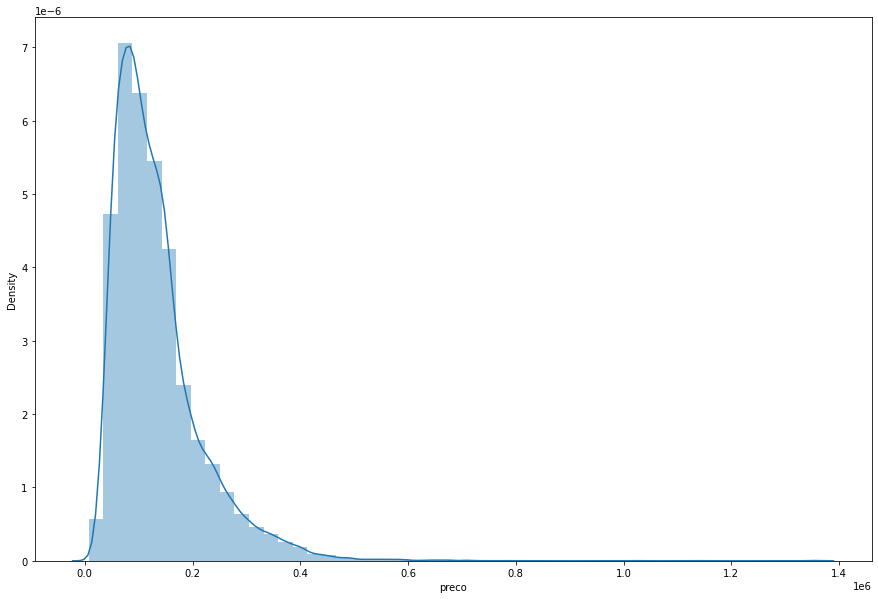

In [ ]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.distplot(df1['preco'])

#### **1.7.2 Categorical Attributes**

In [ ]:
cat_attributes.describe()

,ID,marca,modelo,versao,cambio,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,...,entrega_delivery,troca,elegivel_revisao,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro
count,39446,39446,39446,39446,39446,39446,39446,39446,39446,39446,...,39446,39446,39446,39446,39446,39446,39446,39446,39446,39446
unique,39446,41,473,2058,7,8,2,8,2,648,...,2,2,1,2,2,2,2,2,2,2
top,105869496634249611881157692933406072990,VOLKSWAGEN,COMPASS,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,Automática,Sedã,N,Branco,PF,São Paulo,...,False,False,False,Aceita troca,0,0,IPVA pago,Licenciado,0,0
freq,1,6140,1967,1825,30073,21910,39128,27919,23857,8198,...,31508,32740,39446,29230,25548,27207,26223,21250,33658,31543


In [ ]:
df1['cambio'].unique()

array(['Automática', 'Manual', 'CVT', 'Automatizada', 'Semi-automática',
       'Automatizada DCT', 'Automática Sequencial'], dtype=object)

In [ ]:
cat_attributes.apply(lambda x: x.unique().shape[0])

ID                                                            39446
marca                                                            41
modelo                                                          473
versao                                                         2058
cambio                                                            7
tipo                                                              8
blindado                                                          2
cor                                                               8
tipo_vendedor                                                     2
cidade_vendedor                                                 648
estado_vendedor                                                  25
tipo_anuncio                                                      4
entrega_delivery                                                  2
troca                                                             2
elegivel_revisao                                

## **2.0 Feature Engineering**

In [ ]:
df2 = df1.copy()

## **3.0 Filtragem de Variáveis**

In [ ]:
df3 = df2.copy()

In [ ]:
df3.drop(columns=['ID'], inplace=True)

## **4.0 EDA (Exploratory Data Analysis)**

In [ ]:
df4 = df3.copy()

array([[<AxesSubplot:title={'center':'num_fotos'}>,
        <AxesSubplot:title={'center':'ano_de_fabricacao'}>],
       [<AxesSubplot:title={'center':'ano_modelo'}>,
        <AxesSubplot:title={'center':'odometro'}>],
       [<AxesSubplot:title={'center':'num_portas'}>,
        <AxesSubplot:title={'center':'preco'}>]], dtype=object)

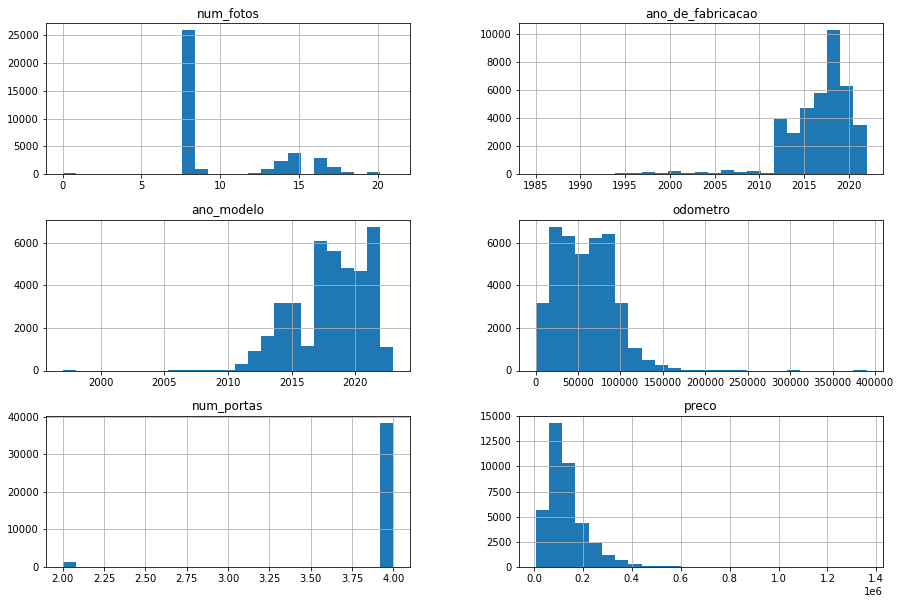

In [ ]:
num_attributes.hist(bins=25)

In [ ]:
df4['attr_veiculo_único_dono'].unique()

array(['0', 'Único dono'], dtype=object)

## **5.0 Data Preparation**

In [ ]:
df5 = df4.copy()

In [ ]:
# X = df5.drop('preco', axis=1)
# y = df5['preco'].copy()

# x_train, x_val, y_train, y_val = ms.train_test_split(X, y, test_size=0.20)
# #x_val_api = x_val.copy()
# df5 = pd.concat([x_train, y_train], axis=1)

#### **5.1 Rescaling**

In [ ]:
rs = RobustScaler()
mms = MinMaxScaler()

df5['num_fotos'] = mms.fit_transform(df5[['num_fotos']].values)
df5['ano_de_fabricacao'] = mms.fit_transform(df5[['ano_de_fabricacao']].values)
df5['ano_modelo'] = mms.fit_transform(df5[['ano_modelo']].values)
df5['num_portas'] = mms.fit_transform(df5[['num_portas']].values)

df5['odometro'] = rs.fit_transform(df5[['odometro']].values)

#### **5.2 Response Variable Transformation**

In [ ]:
df5['preco'] = np.log1p(df5['preco'])

#### **5.3 Encoding**

In [ ]:
le = LabelEncoder()
df5['marca'] = le.fit_transform(df5['marca'])
df5['modelo'] = le.fit_transform(df5['modelo'])
df5['versao'] = le.fit_transform(df5['versao'])
df5['cambio'] = le.fit_transform(df5['cambio'])
df5['tipo'] = le.fit_transform(df5['tipo'])
df5['blindado'] = le.fit_transform(df5['blindado'])
df5['cor'] = le.fit_transform(df5['cor'])
df5['tipo_vendedor'] = le.fit_transform(df5['tipo_vendedor'])
df5['entrega_delivery'] = le.fit_transform(df5['entrega_delivery'])
df5['troca'] = le.fit_transform(df5['troca'])
df5['attr_veiculo_único_dono'] = le.fit_transform(df5['attr_veiculo_único_dono'])
df5['attr_veiculo_todas_as_revisões_feitas_pela_concessionária'] = le.fit_transform(df5['attr_veiculo_todas_as_revisões_feitas_pela_concessionária'])
df5['attr_veiculo_ipva_pago'] = le.fit_transform(df5['attr_veiculo_ipva_pago'])
df5['attr_veiculo_licenciado'] = le.fit_transform(df5['attr_veiculo_licenciado'])
df5['attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro'] = le.fit_transform(df5['attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro'])
df5['attr_veiculo_garantia_de_fábrica'] = le.fit_transform(df5['attr_veiculo_garantia_de_fábrica'])
df5['attr_veiculo_garantia_de_fábrica'] = le.fit_transform(df5['attr_veiculo_garantia_de_fábrica'])
df5['elegivel_revisao'] = le.fit_transform(df5['elegivel_revisao'])
df5['attr_veiculo_aceita_troca'] = le.fit_transform(df5['attr_veiculo_aceita_troca'])
df5['cidade_vendedor'] = le.fit_transform(df5['cidade_vendedor'])
df5['estado_vendedor'] = le.fit_transform(df5['estado_vendedor'])
df5['tipo_anuncio'] = le.fit_transform(df5['tipo_anuncio'])

#### **5.4 Validation Preparation**

In [ ]:
# x_val['num_fotos'] = mms.fit_transform(x_val[['num_fotos']].values)
# x_val['ano_de_fabricacao'] = mms.fit_transform(x_val[['ano_de_fabricacao']].values)
# x_val['ano_modelo'] = mms.fit_transform(x_val[['ano_modelo']].values)
# x_val['num_portas'] = mms.fit_transform(x_val[['num_portas']].values)
# x_val['odometro'] = rs.fit_transform(x_val[['odometro']].values)

# x_val['marca'] = le.fit_transform(x_val['marca'])
# x_val['modelo'] = le.fit_transform(x_val['modelo'])
# x_val['versao'] = le.fit_transform(x_val['versao'])
# x_val['cambio'] = le.fit_transform(x_val['cambio'])
# x_val['tipo'] = le.fit_transform(x_val['tipo'])
# x_val['blindado'] = le.fit_transform(x_val['blindado'])
# x_val['cor'] = le.fit_transform(x_val['cor'])
# x_val['tipo_vendedor'] = le.fit_transform(x_val['tipo_vendedor'])
# x_val['entrega_delivery'] = le.fit_transform(x_val['entrega_delivery'])
# x_val['troca'] = le.fit_transform(x_val['troca'])
# x_val['attr_veiculo_único_dono'] = le.fit_transform(x_val['attr_veiculo_único_dono'])
# x_val['attr_veiculo_todas_as_revisões_feitas_pela_concessionária'] = le.fit_transform(x_val['attr_veiculo_todas_as_revisões_feitas_pela_concessionária'])
# x_val['attr_veiculo_ipva_pago'] = le.fit_transform(x_val['attr_veiculo_ipva_pago'])
# x_val['attr_veiculo_licenciado'] = le.fit_transform(x_val['attr_veiculo_licenciado'])
# x_val['attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro'] = le.fit_transform(x_val['attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro'])
# x_val['attr_veiculo_garantia_de_fábrica'] = le.fit_transform(x_val['attr_veiculo_garantia_de_fábrica'])
# x_val['attr_veiculo_garantia_de_fábrica'] = le.fit_transform(x_val['attr_veiculo_garantia_de_fábrica'])
# x_val['elegivel_revisao'] = le.fit_transform(x_val['elegivel_revisao'])
# x_val['attr_veiculo_aceita_troca'] = le.fit_transform(x_val['attr_veiculo_aceita_troca'])
# x_val['cidade_vendedor'] = le.fit_transform(x_val['cidade_vendedor'])
# x_val['estado_vendedor'] = le.fit_transform(x_val['estado_vendedor'])
# x_val['tipo_anuncio'] = le.fit_transform(x_val['tipo_anuncio'])

## **6.0 Feature Selection**

In [ ]:
df6 = df5.copy()

In [ ]:
df6.head()

,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,odometro,cambio,num_portas,tipo,...,troca,elegivel_revisao,attr_veiculo_aceita_troca,attr_veiculo_único_dono,attr_veiculo_todas_as_revisões_feitas_pela_concessionária,attr_veiculo_ipva_pago,attr_veiculo_licenciado,attr_veiculo_garantia_de_fábrica,attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro,preco
0,0.38,39,64,1396,0.86,0.77,-0.03,2,1.00,5,...,0,0,1,0,1,1,1,0,1,11.72
1,0.38,17,193,1005,0.86,0.77,-0.19,2,1.00,7,...,0,0,1,0,1,1,0,0,1,12.51
2,0.67,5,149,833,0.73,0.62,1.28,2,1.00,6,...,1,0,1,0,0,0,0,0,0,10.89
3,0.38,30,45,955,0.95,0.92,-0.85,2,0.00,5,...,0,0,1,0,1,0,0,0,0,12.61
4,0.38,40,458,1169,0.81,0.73,-0.27,2,1.00,7,...,0,0,1,0,1,0,0,0,1,12.45


### **6.1 Features Importance**

In [ ]:
X = df5.drop('preco', axis=1)
y = df5['preco'].copy()

x_train, x_val, y_train, y_val = ms.train_test_split(X, y, test_size=0.20)

In [ ]:
x_train.shape

(31556, 26)

In [ ]:
x_train.shape

(31556, 26)

In [ ]:
# model definition
forest = en.ExtraTreesRegressor(n_estimators = 250, random_state=0, n_jobs=-1)

#data preparation
x_train_n = df6.drop(['preco'], axis=1)
y_train_n = y.values
forest.fit(x_train_n, y_train_n)

NameError: name 'en' is not defined

In [ ]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# print the feature ranking
print("Feature Ranking:")
df = pd.DataFrame()
for i, j in zip(x_train_n, forest.feature_importances_):
    aux=pd.DataFrame({'feature':i, 'importance':j}, index=[0])
    df = pd.concat([df, aux], axis=0)

print(df.sort_values('importance', ascending=False))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature_importances")
plt.bar(range(x_train_n.shape[1]), importances[indices], color='r', yerr=std[indices], align='center')
plt.xticks(range(x_train_n.shape[1]), indices)
plt.xlim((-1, x_train_n.shape[1]))
plt.show()

#### **6.2 Manual Feature Selection**

In [ ]:
cols_selected = ['odometro','tipo','ano_modelo','ano_de_fabricacao','marca','modelo','cambio','cor','cidade_vendedor','estado_vendedor','attr_veiculo_aceita_troca']

# columns to add
feat_to_add = ['preco']

# final features
cols_selected_full = cols_selected.copy()
cols_selected_full.extend(feat_to_add)

In [ ]:
x_train = x_train[cols_selected]
x_val = x_val[cols_selected]

# variaveis relevantes com data e sales
x_training = df5[cols_selected_full]

In [ ]:
# cols_selected = ['odometro','tipo','ano_modelo','ano_de_fabricacao','marca','modelo','cambio','cor','cidade_vendedor','estado_vendedor','attr_veiculo_aceita_troca']

# x_train = df5[cols_selected]
# x_validation = x_val[cols_selected]
# y_validation = y_val.copy()

## **7.0 Model Training**

#### **7.1 Model Average**

In [ ]:
aux1 = x_val.copy()
aux1['preco'] = y_val.copy()

# prediction
aux2 = aux1[['ID', 'preco']].groupby('ID').mean().reset_index().rename(columns={'preco':'predictions'})
aux1 = pd.merge(aux1, aux2, how='left', on='ID')
yhat_baseline = aux1['predictions']

# performance
baseline_result = ml_error('Avarage Model', np.expm1(y_test), np.expm1(yhat_baseline))
baseline_result

#### **7.2 Linear Regression Model**

In [ ]:
x_training.shape

In [ ]:
y_train.shape

In [ ]:
# model
lr = LinearRegression().fit(x_train, y_train)

# prediction 
yhat_lr = lr.predict(x_val)

# performance
lr_result = ml_error('Linear Regression', np.expm1(y_val), np.expm1(yhat_lr))
lr_result

In [ ]:
np.expm1(yhat_lr)

## **8.0 Hyperparameter Fine Tuning**

## **9.0 Tradução e interpretação do erro**

## **10.0 Producao**

In [ ]:
df_test = pd.read_csv('data/teste.csv')

In [ ]:
df_test['num_fotos'].fillna(0, inplace=True)
df_test['attr_veiculo_aceita_troca'].fillna('0', inplace=True)
df_test['attr_veiculo_único_dono'].fillna('0', inplace=True)
df_test['attr_veiculo_todas_as_revisões_feitas_pela_concessionária'].fillna('0', inplace=True)
df_test['attr_veiculo_ipva_pago'].fillna('0', inplace=True)
df_test['attr_veiculo_licenciado'].fillna('0', inplace=True)
df_test['attr_veiculo_garantia_de_fábrica'].fillna('0', inplace=True)
df_test['attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro'].fillna('0', inplace=True)

df_test['ano_modelo'] = df_test['ano_modelo'].astype(int)
df_test['entrega_delivery'] = df_test['entrega_delivery'].astype(str)
df_test['troca'] = df1['troca'].astype(str)
df_test['elegivel_revisao'] = df_test['elegivel_revisao'].astype(str)

df_test.drop(columns=['attr_veiculo_alienado','ID'], inplace=True)

df_test['num_fotos'] = mms.fit_transform(df_test[['num_fotos']].values)
df_test['ano_de_fabricacao'] = mms.fit_transform(df_test[['ano_de_fabricacao']].values)
df_test['ano_modelo'] = mms.fit_transform(df_test[['ano_modelo']].values)
df_test['num_portas'] = mms.fit_transform(df_test[['num_portas']].values)

df_test['odometro'] = rs.fit_transform(df_test[['odometro']].values)

le = LabelEncoder()
df_test['marca'] = le.fit_transform(df_test['marca'])
df_test['modelo'] = le.fit_transform(df_test['modelo'])
df_test['versao'] = le.fit_transform(df_test['versao'])
df_test['cambio'] = le.fit_transform(df_test['cambio'])
df_test['tipo'] = le.fit_transform(df_test['tipo'])
df_test['blindado'] = le.fit_transform(df_test['blindado'])
df_test['cor'] = le.fit_transform(df_test['cor'])
df_test['tipo_vendedor'] = le.fit_transform(df_test['tipo_vendedor'])
df_test['entrega_delivery'] = le.fit_transform(df_test['entrega_delivery'])
df_test['troca'] = le.fit_transform(df_test['troca'])
df_test['attr_veiculo_único_dono'] = le.fit_transform(df_test['attr_veiculo_único_dono'])
df_test['attr_veiculo_todas_as_revisões_feitas_pela_concessionária'] = le.fit_transform(df_test['attr_veiculo_todas_as_revisões_feitas_pela_concessionária'])
df_test['attr_veiculo_ipva_pago'] = le.fit_transform(df_test['attr_veiculo_ipva_pago'])
df_test['attr_veiculo_licenciado'] = le.fit_transform(df_test['attr_veiculo_licenciado'])
df_test['attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro'] = le.fit_transform(df_test['attr_veiculo_todas_as_revisões_feitas_pela_agenda_do_carro'])
df_test['attr_veiculo_garantia_de_fábrica'] = le.fit_transform(df_test['attr_veiculo_garantia_de_fábrica'])
df_test['attr_veiculo_garantia_de_fábrica'] = le.fit_transform(df_test['attr_veiculo_garantia_de_fábrica'])
df_test['elegivel_revisao'] = le.fit_transform(df_test['elegivel_revisao'])
df_test['attr_veiculo_aceita_troca'] = le.fit_transform(df_test['attr_veiculo_aceita_troca'])
df_test['cidade_vendedor'] = le.fit_transform(df_test['cidade_vendedor'])
df_test['estado_vendedor'] = le.fit_transform(df_test['estado_vendedor'])
df_test['tipo_anuncio'] = le.fit_transform(df_test['tipo_anuncio'])

In [ ]:
df_test.head()

In [ ]:
cols_selected = ['odometro','tipo','ano_modelo','ano_de_fabricacao','marca','modelo','cambio','cor','cidade_vendedor','estado_vendedor','attr_veiculo_aceita_troca']

# columns to add
feat_to_add = ['preco']

# final features
cols_selected_full = cols_selected.copy()
cols_selected_full.extend(feat_to_add)

In [ ]:
df_test = df_test[cols_selected]

In [ ]:
# prediction 
yhat_lr_test = lr.predict(df_test)

In [ ]:
predicts = np.expm1(yhat_lr_test)

In [ ]:
df_test_env = pd.read_csv('data/teste.csv')

In [ ]:
df_test_env = df_test_env['ID']

In [ ]:
df_final = pd.DataFrame({'ID':df_test_env,'preco': predicts}).set_index('ID')

In [ ]:
df_final.head()

In [ ]:
df_final.to_csv('brainRent_predictions.csv')